# Cardiovascular Disease Prediction using Machine Learning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
# Load the dataset
df = pd.read_csv(r'E:\CORIZO\PROJECT\cardio_train.csv',sep=";")

In [3]:
print(df.columns)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [4]:
# Data Analysis and Visualization
print(df.describe())

                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250    

In [5]:
# Data preprocessing
X = df.drop(columns=['id', 'cardio'] , axis = 1)
y = df['cardio']

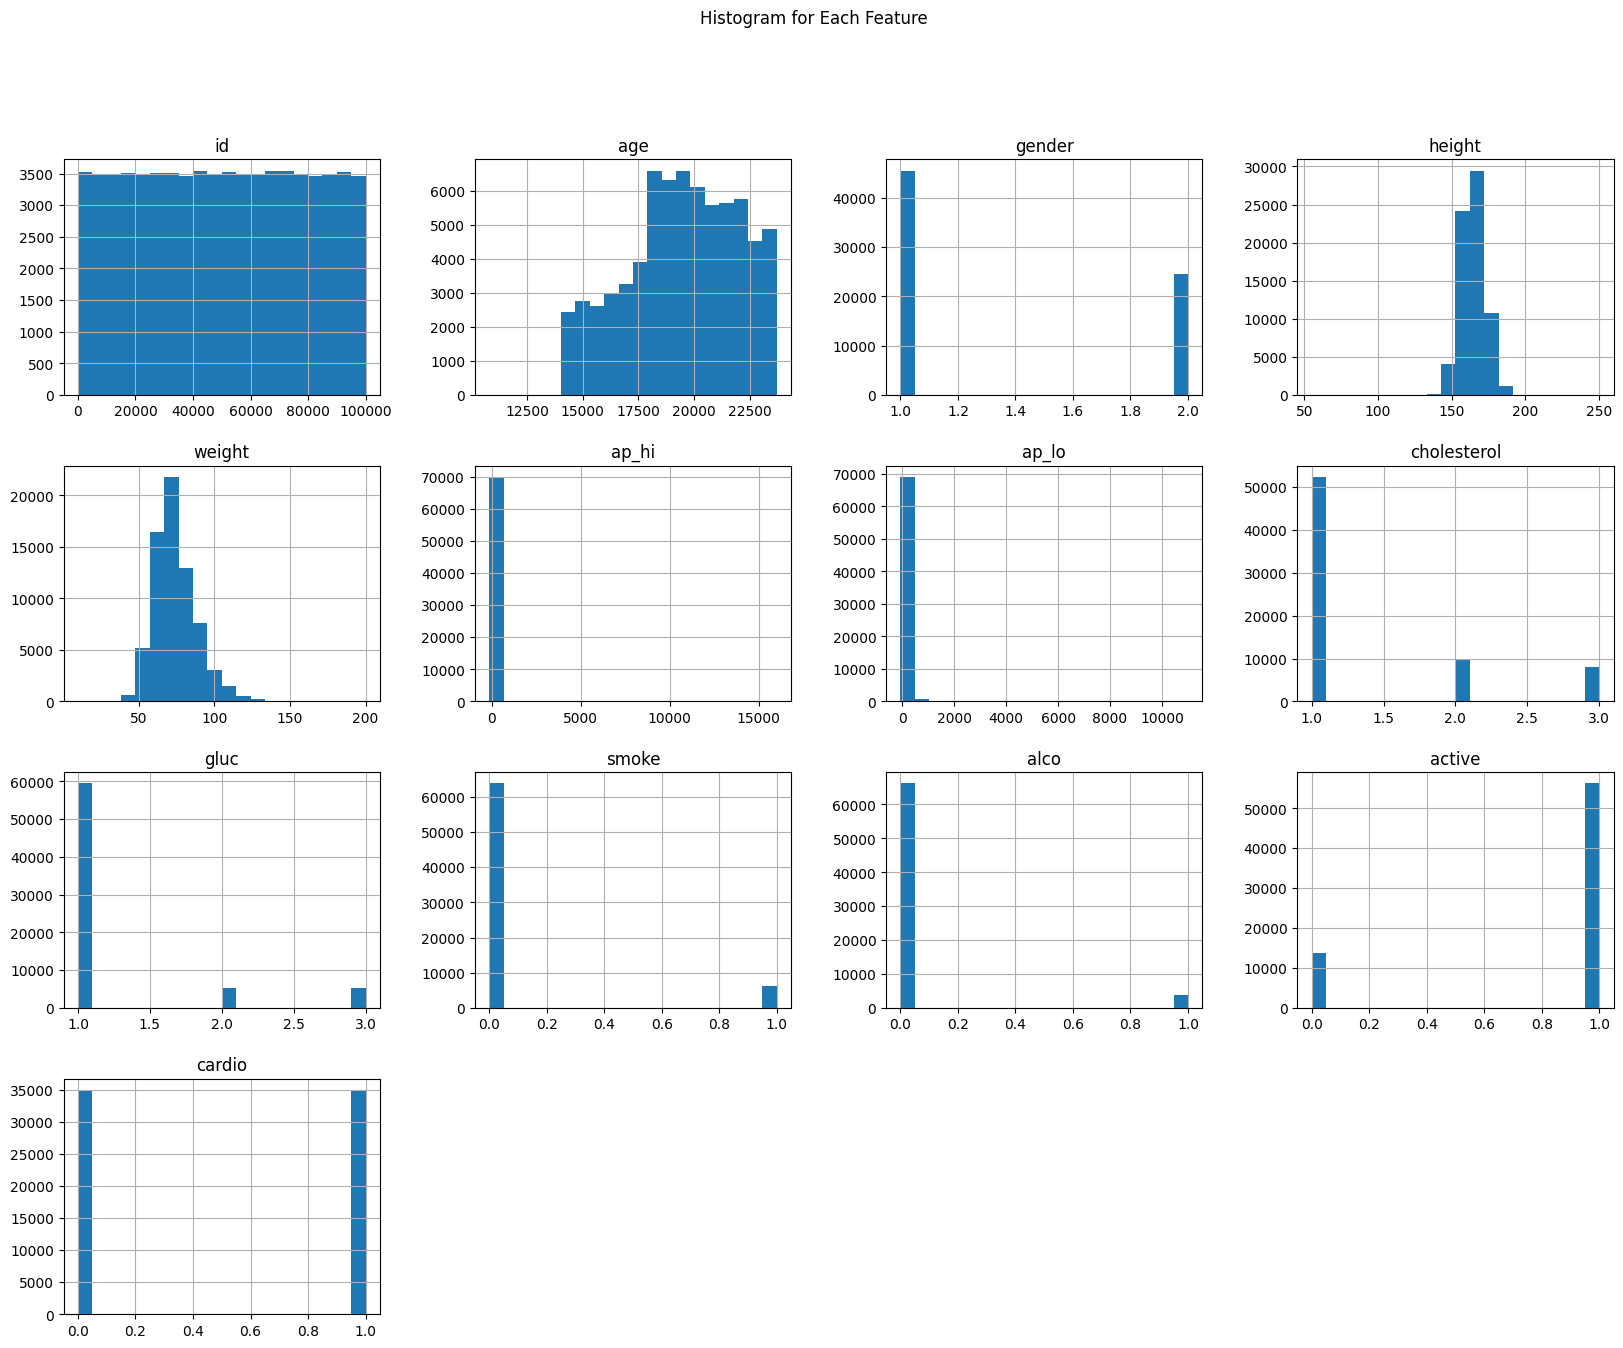

In [6]:
# Histograms for each feature
df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histogram for Each Feature')
plt.show()

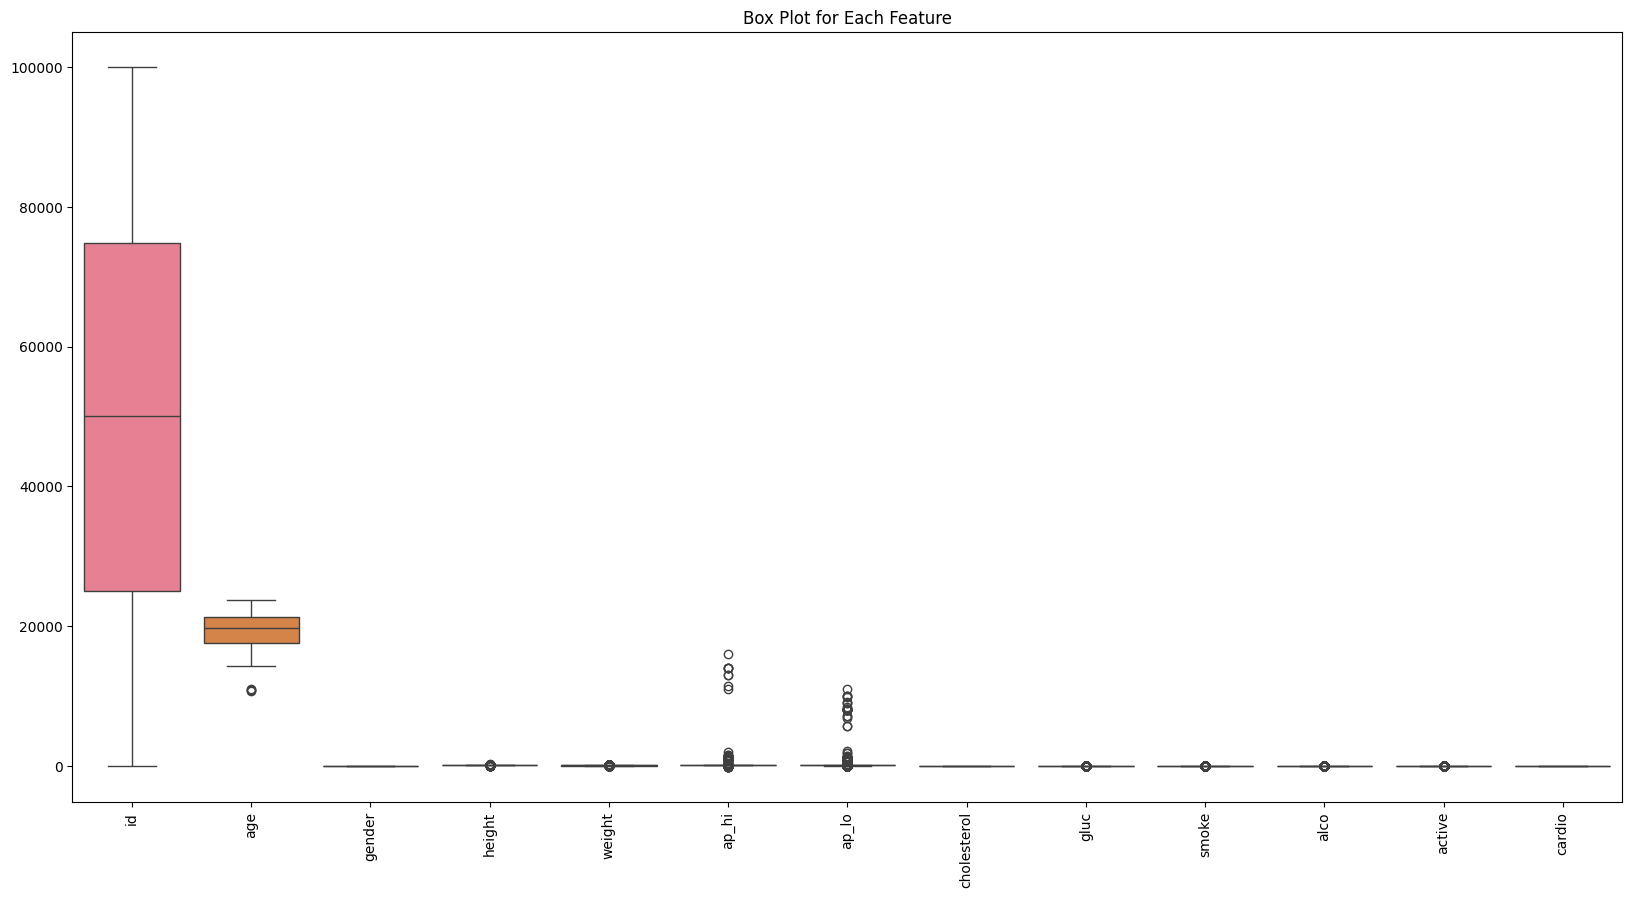

In [7]:
# Box plots for each feature
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.title('Box Plot for Each Feature')
plt.xticks(rotation=90)
plt.show()

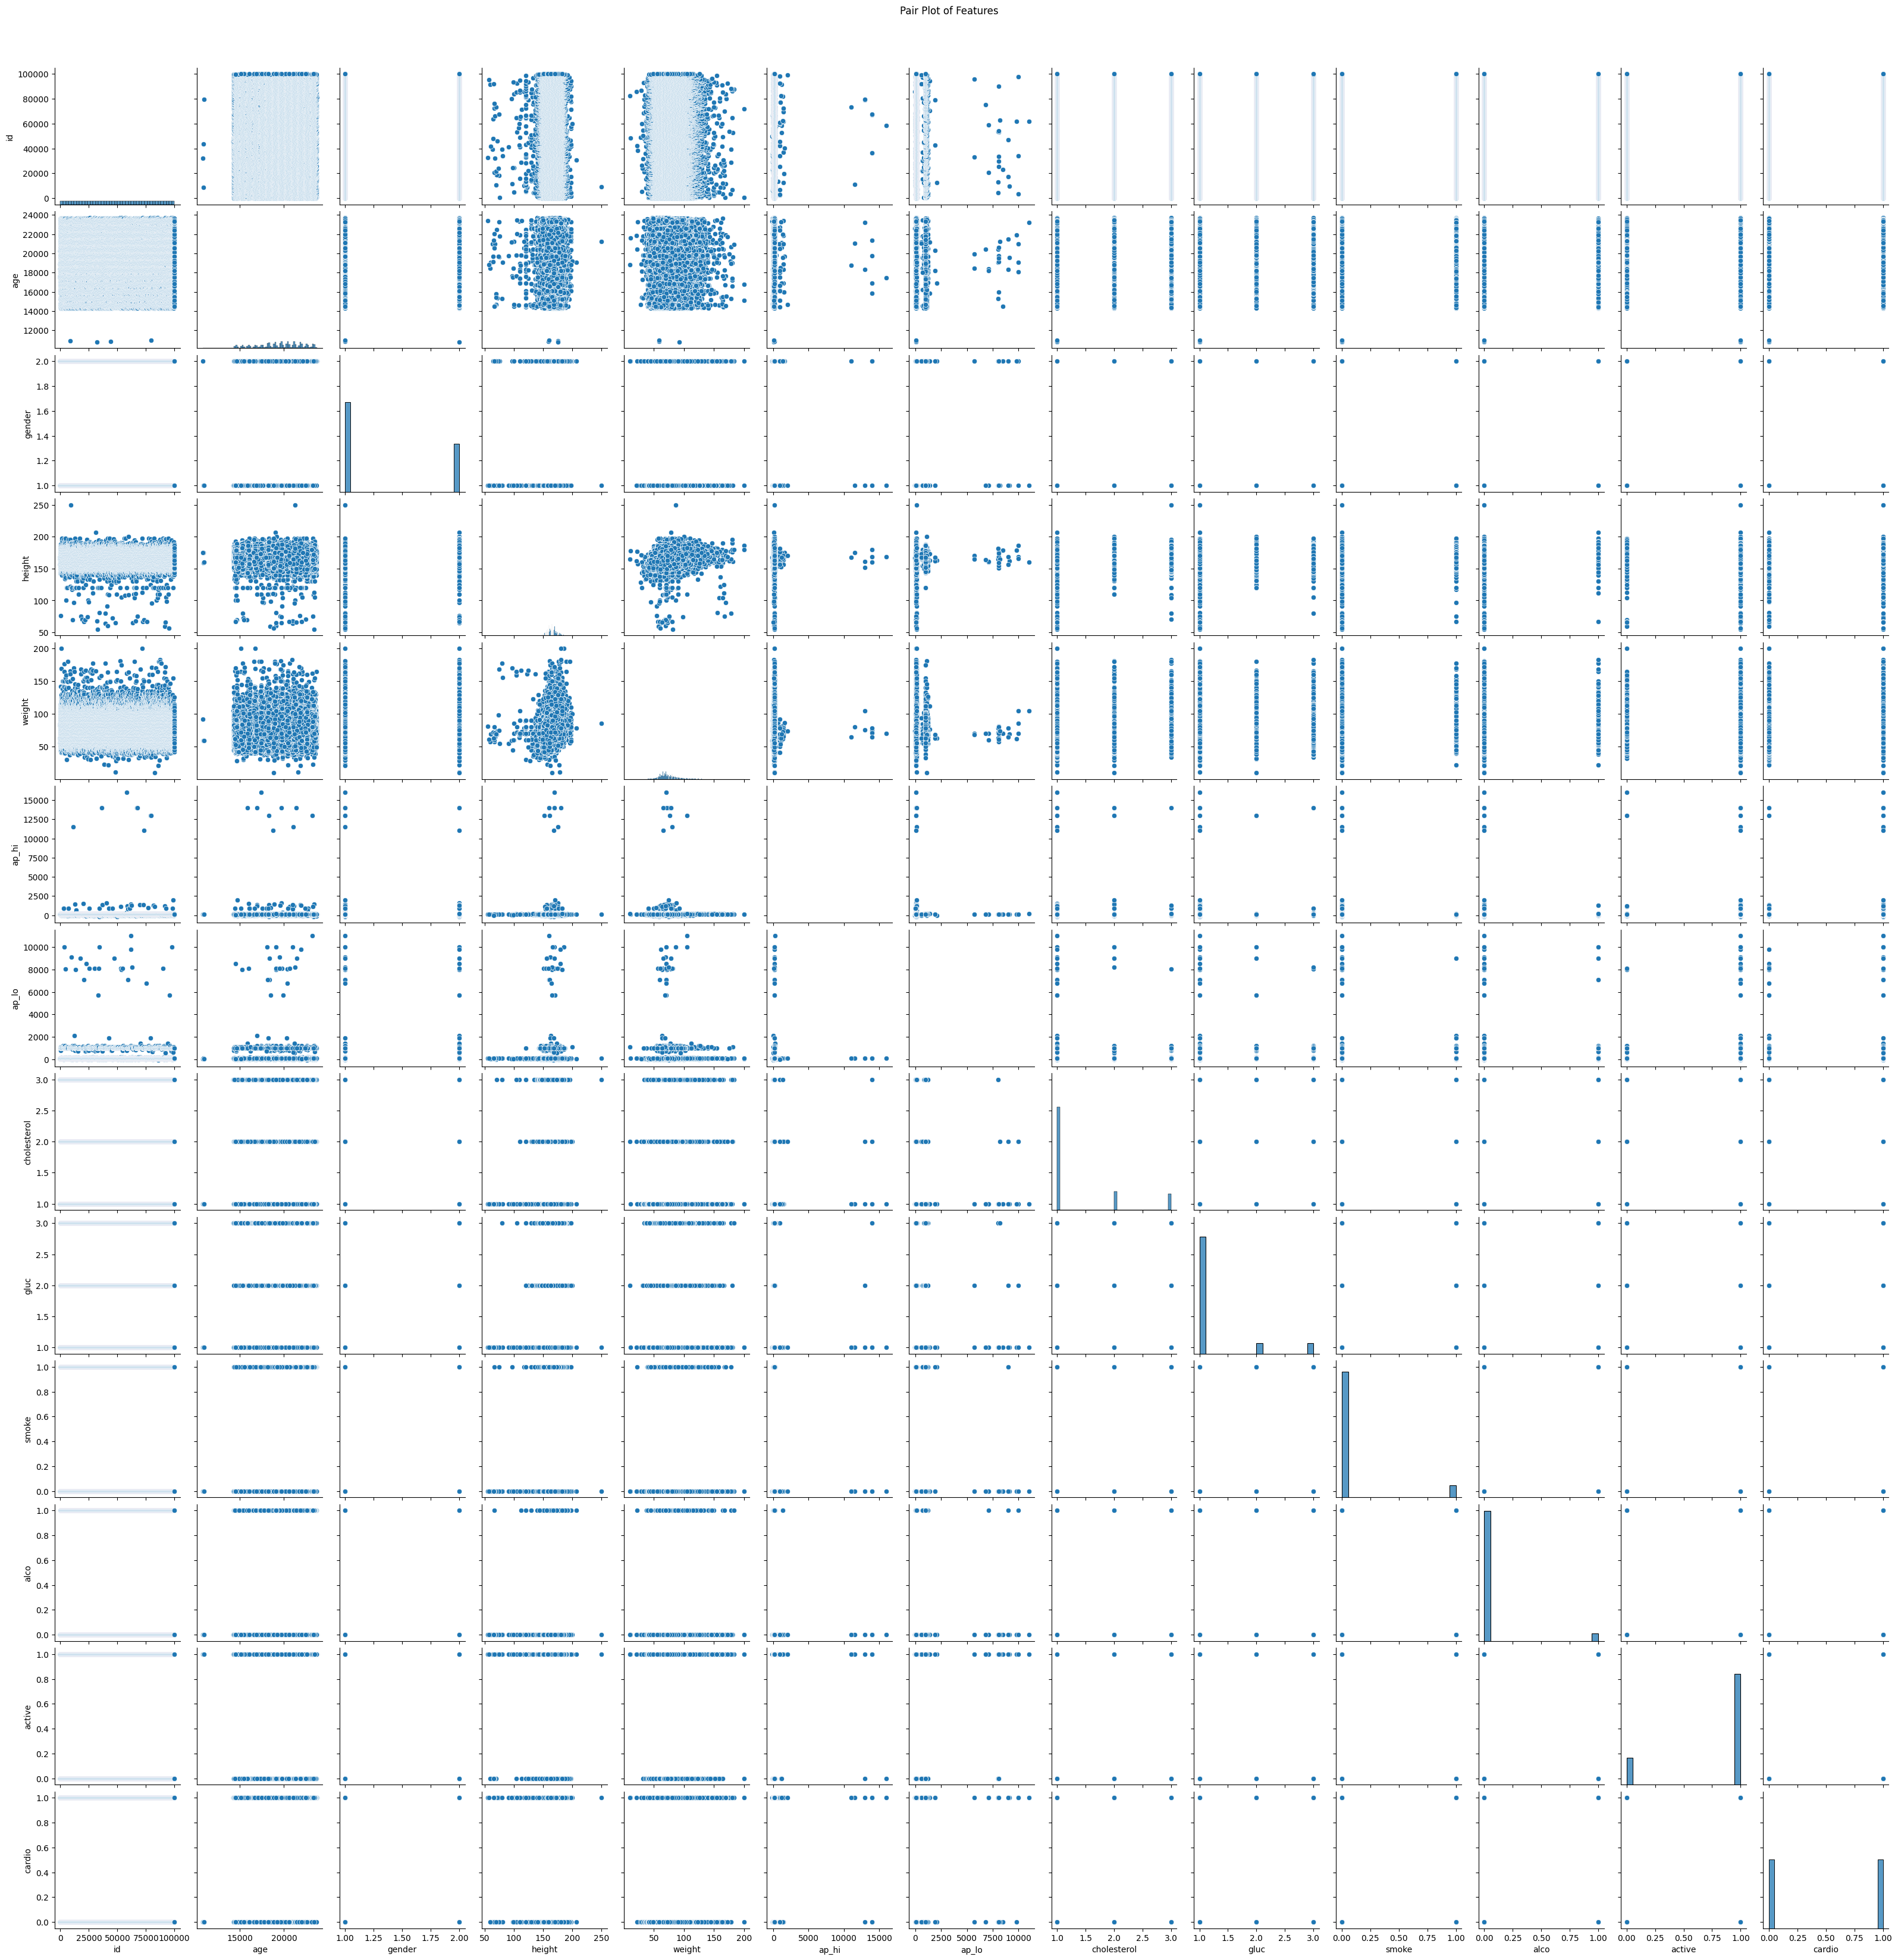

In [8]:
# Pair plot of features
sns.pairplot(df)
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

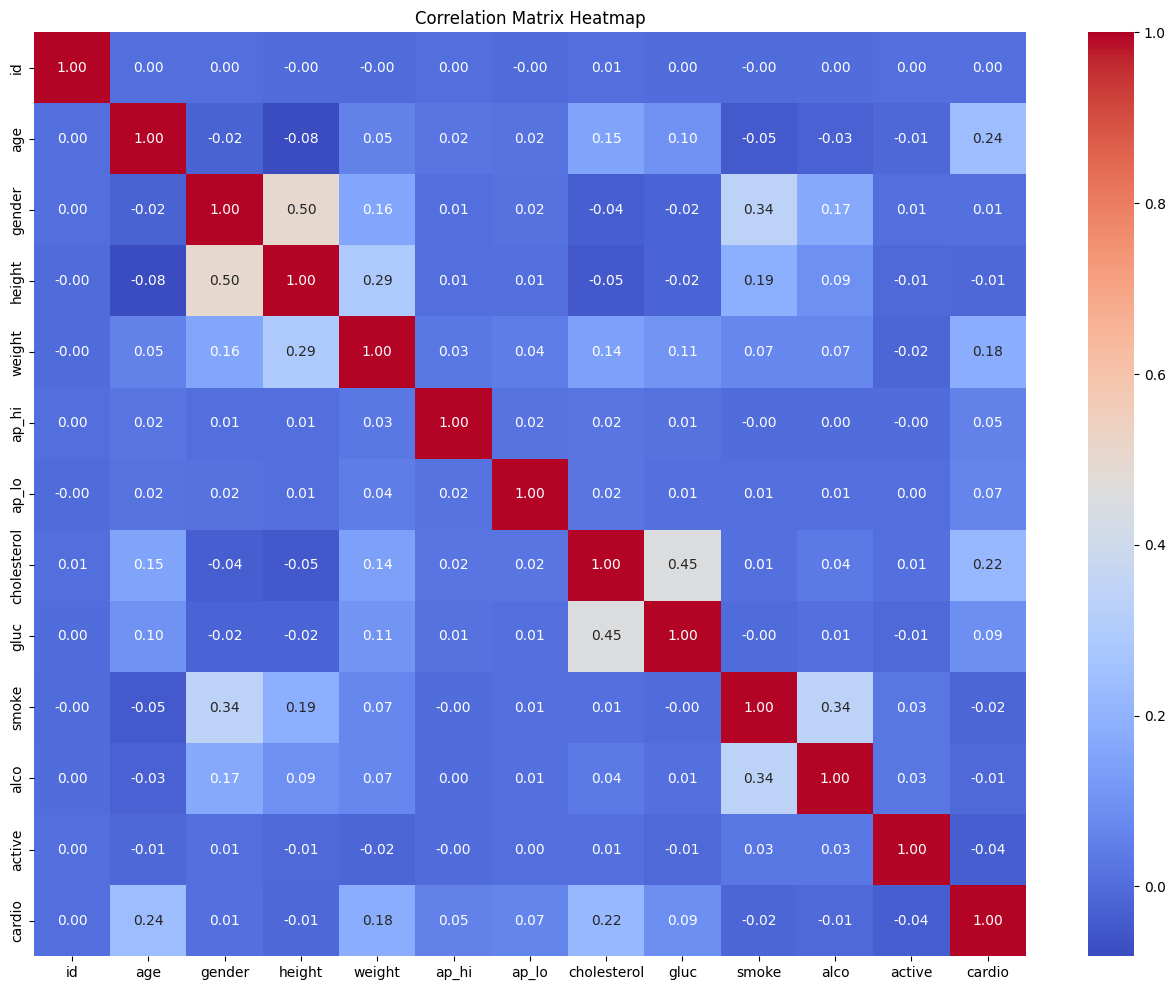

In [9]:
# Correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

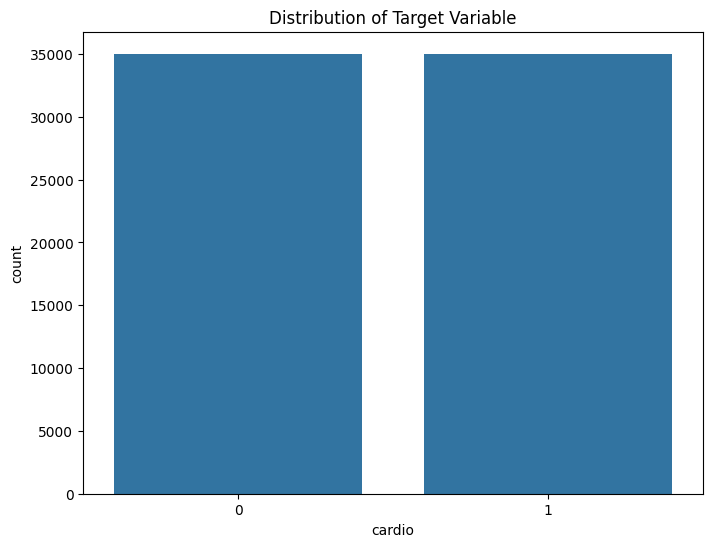

In [10]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='cardio', data=df)
plt.title('Distribution of Target Variable')
plt.show()

In [11]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

Random Forest Accuracy: 71.30%


In [14]:
# K-Nearest Neighbors Classifier
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
knn_classifier = KNeighborsClassifier(n_neighbors=50)
knn_classifier.fit(X_train_pca, y_train)
y_pred_knn = knn_classifier.predict(X_test_pca)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")
print('KNN Confusion Matrix:')
print(conf_matrix_knn)

KNN Accuracy: 0.7168571428571429
KNN Confusion Matrix:
[[5536 1452]
 [2512 4500]]


In [15]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print('Logistic Regression Confusion Matrix:')
print(conf_matrix_log_reg)

Logistic Regression Accuracy: 0.7236428571428571
Logistic Regression Confusion Matrix:
[[5363 1625]
 [2244 4768]]


In [16]:
# Support Vector Machine (SVM)
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train_scaled, y_train)
y_pred_svm = svm_classifier.predict(X_test_scaled)
y_pred_svm_proba = svm_classifier.predict_proba(X_test_scaled)[:, 1]
accuracy_svm = accuracy_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm_proba)
print(f"SVM Accuracy: {accuracy_svm}")
print(f"SVM ROC AUC Score: {roc_auc_svm}")
print('SVM Classification Report:')
print(classification_report(y_test, y_pred_svm))
print('SVM Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.7319285714285715
SVM ROC AUC Score: 0.7895140957148935
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000

SVM Confusion Matrix:
[[5323 1665]
 [2088 4924]]
